In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm

import pandas as pd
import numpy as np

from time import time, clock
import itertools
import re

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.lda import LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sys import path
path.append('../Starting_Kit/ingestion_program/')
from data_manager import DataManager
from data_io import write
%matplotlib inline

## Data loading and preprocessing

In [4]:
D = DataManager('credit','', replace_missing=True)
print(D)

X = D.data['X_train']
y = D.data['Y_train']

Info file found : C:\Users\Hoël\Documents\vrais documents\AIC\Biomed\credit\credit_public.info
DataManager : credit
info:
	feat_num = 56
data:
	X_train = array(121500, 56)
	Y_train = array(121500,)
	X_valid = array(15000, 56)
	X_test = array(13500, 56)
feat_type:	array(56,)
feat_idx:	array(0,)
	has_missing = 0
data:
	X_train = array(121500, 56)
	Y_train = array(121500,)
	X_valid = array(15000, 56)
	X_test = array(13500, 56)
feat_type:	array(56,)
feat_idx:	array(0,)
	target_type = Numerical
data:
	X_train = array(121500, 56)
	Y_train = array(121500,)
	X_valid = array(15000, 56)
	X_test = array(13500, 56)
feat_type:	array(56,)
feat_idx:	array(0,)
	train_num = 96000
data:
	X_train = array(121500, 56)
	Y_train = array(121500,)
	X_valid = array(15000, 56)
	X_test = array(13500, 56)
feat_type:	array(56,)
feat_idx:	array(0,)
	target_num = 1
data:
	X_train = array(121500, 56)
	Y_train = array(121500,)
	X_valid = array(15000, 56)
	X_test = array(13500, 56)
feat_type:	array(56,)
feat_idx:	array(

# Crossval

In [5]:
#split our dataset into train/validation/test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
nsplits = 5
kfold = KFold(n_splits = nsplits,random_state = 42)

## The baseline

In [6]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

y_probas = tree.predict_proba(X_test)[:,1]
y_pred = tree.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.618
Mean accuracy : 0.900


## Classifiers comparison

In [14]:
RF = RandomForestClassifier(n_estimators=150, criterion ='gini',random_state=42, n_jobs=-1)
RF.fit(X_train,y_train)

y_probas = RF.predict_proba(X_test)[:,1]
y_pred = RF.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.850
Mean accuracy : 0.936


In [15]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_probas = xgb.predict_proba(X_test)[:,1]
y_pred = xgb.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.875
Mean accuracy : 0.938


In [16]:
ada = AdaBoostClassifier(n_estimators=600, learning_rate=0.5, random_state = 42)
ada.fit(X_train,y_train)

y_probas = ada.predict_proba(X_test)[:,1]
y_pred = ada.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.867
Mean accuracy : 0.937


In [17]:
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train,y_train)

y_probas = mlp.predict_proba(X_test)[:,1]
y_pred = mlp.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.838
Mean accuracy : 0.937


In [18]:
lda = LDA()
lda.fit(X_train,y_train)

y_probas = lda.predict_proba(X_test)[:,1]
y_pred = lda.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.835
Mean accuracy : 0.934


C:\Program Files\Python 3.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [19]:
naive = GaussianNB()
naive.fit(X_train,y_train)

y_probas = naive.predict_proba(X_test)[:,1]
y_pred = naive.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.741
Mean accuracy : 0.933


In [20]:
sgd = SGDClassifier(loss = 'log')
sgd.fit(X_train,y_train)

y_probas = sgd.predict_proba(X_test)[:,1]
y_pred = sgd.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.684
Mean accuracy : 0.930


In [21]:
boost = GradientBoostingClassifier(random_state = 42)
boost.fit(X_train,y_train)

y_probas = boost.predict_proba(X_test)[:,1]
y_pred = boost.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.876
Mean accuracy : 0.937


In [22]:
reglog = LogisticRegression()
reglog.fit(X_train,y_train)

y_probas = reglog.predict_proba(X_test)[:,1]
y_pred = reglog.predict(X_test)

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))

AUC: 0.829
Mean accuracy : 0.938


## The corresponding ROC curves

In [13]:
#pour les couleurs:
{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}
{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

{'b', 'c', 'g', 'k', 'm', 'r', 'w', 'y'}

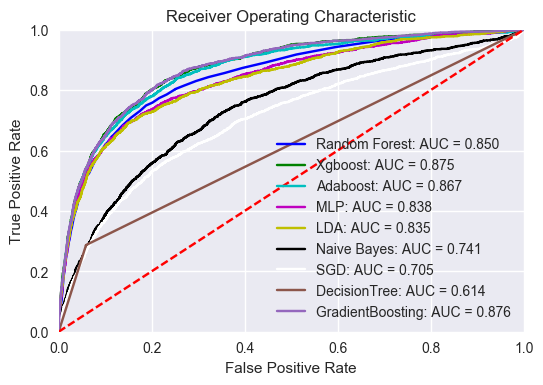

In [14]:
#Random Forest
probas = RF.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'b', label = 'Random Forest: AUC = %0.3f' % auc_score)

#Xgboost
probas = xgb.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'g', label = 'Xgboost: AUC = %0.3f' % auc_score)

#AdaBoost
probas = ada.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'c', label = 'Adaboost: AUC = %0.3f' % auc_score)

#MLPClassifier
probas = mlp.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'm', label = 'MLP: AUC = %0.3f' % auc_score)

#LDA
probas = lda.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'y', label = 'LDA: AUC = %0.3f' % auc_score)

#GaussianNB
probas = naive.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'k', label = 'Naive Bayes: AUC = %0.3f' % auc_score)

#SGDClassifier
probas = sgd.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'w', label = 'SGD: AUC = %0.3f' % auc_score)

#DecisionTree
probas = tree.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'tab:brown', label = 'DecisionTree: AUC = %0.3f' % auc_score)

#GradientBoostingTree
probas = boost.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'tab:purple', label = 'GradientBoosting: AUC = %0.3f' % auc_score)



#PLOT ROC curve
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Some HP search

In [ ]:
""" AdaBoost Classifier """

ada_param_grid = {'n_estimators': [50, 100, 150, 300, 600],
                  'learning_rate': [0.1, 0.2, 0.5, 1., 1.5],
                 }

ada_grid_search = GridSearchCV(estimator = AdaBoostClassifier(random_state=42),
                               param_grid = ada_param_grid,
                               cv=5, n_jobs=-1,
                              verbose = 1,
                               scoring = 'roc_auc')
start = time()
ada_grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(ada_grid_search.grid_scores_)))
print(ada_grid_search.best_params_)

"""Prediction with those best parameters"""

best_ada_clf = AdaBoostClassifier(n_estimators=600, learning_rate=0.5, random_state=42)
best_ada_clf.fit(X_train, y_train)

y_pred = best_ada_clf.predict(X_test)
y_probas = best_ada_clf.predict_proba(X_test)[:,1]

print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Execution time : %.3fs" %(clock()-start))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 49.9min finished


GridSearchCV took 3301.37 seconds for 25 candidate parameter settings.
{'n_estimators': 600, 'learning_rate': 0.1}
AUC: 0.867
Execution time : -1516870747.111s


In [ ]:
""" Gradient Boosting Classifier """

gbc_param_grid = {'n_estimators': [100, 300, 600],
                  'learning_rate': [0.1, 0.2, 0.5, 1.],
                 }

gbc_grid_search = GridSearchCV(estimator = GradientBoostingClassifier(random_state=42),
                               param_grid = gbc_param_grid,
                               cv=5, n_jobs=-1,
                              verbose = 1,
                               scoring = 'roc_auc')
start = clock()
gbc_grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gbc_grid_search.grid_scores_)))
print(gbc_grid_search.best_params_)

best_gbc_clf = gbc_grid_search.best_estimator_
best_gbc_clf.fit(X_train, y_train)

y_pred = best_gbc_clf.predict(X_test)
y_probas = best_gbc_clf.predict_proba(X_test)[:,1]
print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Execution time : %.3fs" %(clock()-start))

In [ ]:
""" Multi-Layer Perceptron Classifier """
nn_param_grid = { 
    'alpha': [0.0001, 0.001, 0.1, 1],
    'learning_rate_init': [0.001, 0.01, 0.1, 1],
    'solver': ['lbfgs', 'adam'],
    'activation': ['relu', 'tanh', 'logistic']
    }

nn_grid_search = GridSearchCV(estimator = MLPClassifier(random_state = 42),
                              param_grid = nn_param_grid,
                              cv = 5, n_jobs = -1,
                              verbose = 1,
                               scoring = 'roc_auc')
start = clock()
nn_grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(nn_grid_search.grid_scores_)))
print(nn_grid_search.best_params_)

best_nn = nn_grid_search.best_estimator_
best_nn.fit(X_train, y_train)

y_pred = best_nn.predict(X_test)
y_probas = best_nn.predict_proba(X_test)[:,1]
print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Execution time : %.3fs" %(clock()-start))

In [ ]:
""" Random Forest Classifier """

rf_param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600],
                  'criterion': ['gini','entropy'],
                  'max_depth': [1,2,5,10,20]
                 }

rf_grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                               param_grid = rf_param_grid,
                               cv=5, n_jobs=-1,
                              verbose = 1,
                               scoring = 'roc_auc')
start = clock()
rf_grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rf_grid_search.grid_scores_)))
print(rf_grid_search.best_params_)

best_rf_clf = rf_grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

y_pred = best_rf_clf.predict(X_test)
y_probas = best_rf_clf.predict_proba(X_test)[:,1]
print("AUC: %.3f" %roc_auc_score(y_test,y_probas))
print("Execution time : %.3fs" %(clock()-start))

# Dimensionality reduction

For 1 components
mean AUC: 0.633
For 2 components
mean AUC: 0.727
For 3 components
mean AUC: 0.770
For 4 components
mean AUC: 0.795
For 5 components
mean AUC: 0.798
For 6 components
mean AUC: 0.810
For 7 components
mean AUC: 0.816
For 8 components
mean AUC: 0.814
For 9 components
mean AUC: 0.817
For 10 components
mean AUC: 0.812
For 11 components
mean AUC: 0.818
For 12 components
mean AUC: 0.817
For 13 components
mean AUC: 0.815
For 14 components
mean AUC: 0.820
For 15 components
mean AUC: 0.824
For 16 components
mean AUC: 0.822
For 17 components
mean AUC: 0.822
For 18 components
mean AUC: 0.821
For 19 components
mean AUC: 0.820
Computation time: 1897.79s


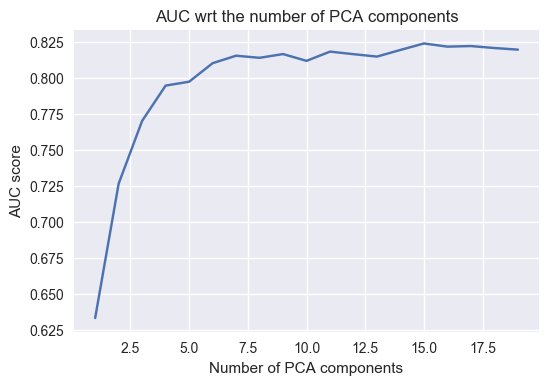

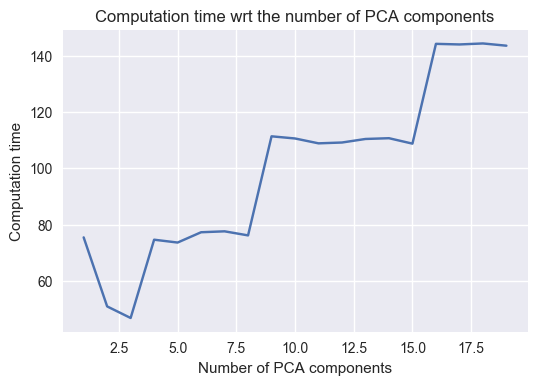

In [17]:
# Optimisation du nombre de composantes dans la PCA
tps = clock()
scores = []
times = []
model = RandomForestClassifier(n_estimators=150, criterion ='entropy')
max_comp = 20
for n_comp in range(1,max_comp):
    tps2 = clock()
    pca = PCA(n_components=n_comp)
    
    Xtr_new = pca.fit_transform(X_train,y_train)
    model.fit(Xtr_new,y_train)
    
    Xte_new = pca.transform(X_test)
    y_probas = model.predict_proba(Xte_new)[:,1]
    score = roc_auc_score(y_test,y_probas)
    
    scores.append(score)
    times.append(clock()-tps2)
    print("For %i components"%n_comp)
    print("mean AUC: %.3f"%score)

print("Computation time: %.2fs" %(clock()-tps))
plt.plot(np.arange(1,max_comp),scores)
plt.title("AUC wrt the number of PCA components")
plt.xlabel("Number of PCA components")
plt.ylabel("AUC score")
plt.figure()
plt.plot(np.arange(1,max_comp),times)
plt.title("Computation time wrt the number of PCA components")
plt.xlabel("Number of PCA components")
plt.ylabel("Computation time")

# Overfitting

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Computation time: 270.99s


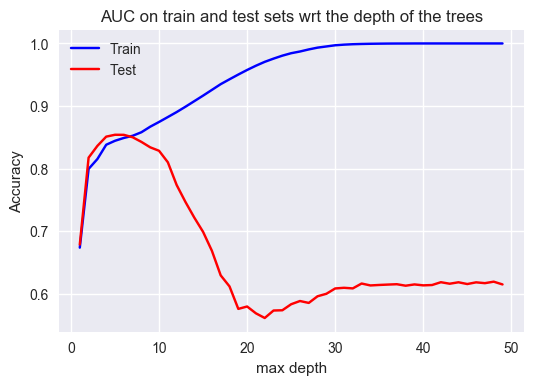

In [10]:
# Check overfitting avec le max_depth
tps = clock()
accuracies = []
max_depth = 50

tr_scores = []
te_scores = []

for depth in range(1,max_depth):
    print(depth)
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train,y_train)
    
    train_probas = model.predict_proba(X_train)[:,1]
    test_probas = model.predict_proba(X_test)[:,1]
    tr_score = roc_auc_score(y_train,train_probas)
    te_score = roc_auc_score(y_test,test_probas)
    tr_scores.append(tr_score)
    te_scores.append(te_score)

print("Computation time: %.2fs" %(clock()-tps))
plt.plot(np.arange(1,max_depth),tr_scores,c = 'b',label = "Train")
plt.plot(np.arange(1,max_depth),te_scores,c = 'r',label = "Test")
plt.legend()
plt.title("AUC on train and test sets wrt the depth of the trees")
plt.xlabel("max depth")
plt.ylabel("AUC")

## n_estimators in random forest

In [ ]:
tps = clock()
max_est = 500
step = 10
scores = []

for nb_est in range(50,max_est,step):
    model = RandomForestClassifier(n_estimators=nb_est, criterion ='gini')
    model.fit(X_train,y_train)
    scores.append(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

print("Computation time: %.2fs" %(clock()-tps))
plt.plot(np.arange(50,max_est,step),scores,c = 'b')
plt.title("AUC on train and test sets wrt the number of estimators")
plt.xlabel("number of estimators")
plt.ylabel("AUC")

## Learning curves

In [ ]:
tps = clock()
scores = []
start,stop,step = 10,len(X_train),1000
print("At most %i rows" %len(X_train))

#best_gbc_clf = GradientBoostingClassifier(random_state = 42, learning_rate = 0.2, n_estimators = 600)

for nb_rows in range(start,stop,step):
    print(nb_rows)
    # On utilise ici un classifieur par gradientboosting avec les meilleurs HP trouvés
    best_gbc_clf.fit(X_train[:nb_rows], y_train[:nb_rows])
    scores.append(roc_auc_score(y_test,best_gbc_clf.predict_proba(X_test)[:,1]))
    
plt.plot(np.arange(start,stop,step),scores)
plt.title('Learning curve of the gradient boosting classififier')
plt.xlabel('Number of training examples')
plt.ylabel('AUC')
print("Execution time: %.3fs" %(clock()-tps))

In [ ]:
tps = clock()
scores = []
start,stop,step = 10,len(X_train),100
print("At most %i rows" %len(X_train))

for nb_rows in range(start,stop,step):
    # On utilise ici un classifieur par random forest avec les meilleurs HP trouvés
    best_rf_clf.fit(X_train[:nb_rows], y_train[:nb_rows])
    scores.append(roc_auc_score(y_test,best_rf_clf.predict_proba(X_test)[:,1]))
    
plt.plot(np.arange(start,stop,step),scores)
plt.title('Learning curve of the random forest classififier')
plt.xlabel('Number of training examples')
plt.ylabel('AUC')
print("Execution time: %.3fs" %(clock()-tps))

## Feature construction

In [27]:
#With a normal RAM capacity, let's only take the top 10 xgboost features
cols = [str(i) for i in range(X.shape[1])]
X_new = pd.DataFrame(X.copy(),columns = cols)

#Select the features
feature_import = xgb.feature_importances_
FI = pd.DataFrame()
FI['Feature']= cols
FI['Importance'] = feature_import
FI.sort_values(by='Importance', ascending=False, inplace=True)
features = FI.head(10).Feature.values

#Creste the new columns
for feat in features:
    for feat2 in features:
        X_new[feat + ' AND ' + feat2] = (X_new[feat] * X_new[feat2])
        X_new[feat + ' OR ' + feat2] = pd.concat([X_new[feat],X_new[feat2]],axis = 1).max(axis = 1)
        
X_train_new, X_test_new,_,_ = train_test_split(X_new,y, test_size = 0.2, random_state=42)

print("Before the feature construction: %i columns" %len(feature_import))
print("After it: %i columns" %X_new.shape[1])

Before the feature construction: 56 columns
After it: 256 columns


C:\Program Files\Python 3.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Execution time: 1751.448s


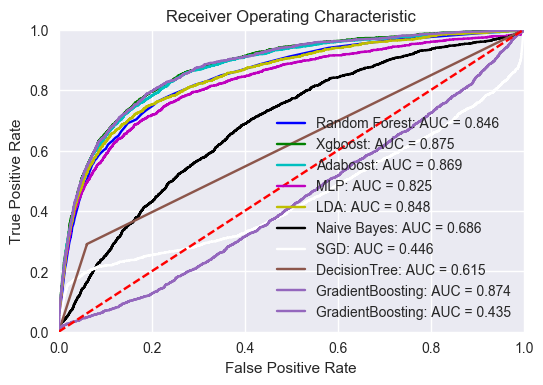

In [28]:
start = clock()
#Random Forest
RF2 = RandomForestClassifier(n_estimators=150, criterion ='gini',random_state=42, n_jobs=-1)
RF2.fit(X_train_new,y_train)
probas = RF2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'b', label = 'Random Forest: AUC = %0.3f' % auc_score)

#Xgboost
xgb2 = XGBClassifier()
xgb2.fit(X_train_new,y_train)
probas = xgb2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'g', label = 'Xgboost: AUC = %0.3f' % auc_score)

#AdaBoost
ada2 = AdaBoostClassifier(n_estimators=600, learning_rate=0.5, random_state = 42)
ada2.fit(X_train_new,y_train)
probas = ada2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'c', label = 'Adaboost: AUC = %0.3f' % auc_score)

#MLPClassifier
mlp2 = MLPClassifier(random_state = 42)
mlp2.fit(X_train_new,y_train)
probas = mlp2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'm', label = 'MLP: AUC = %0.3f' % auc_score)

#LDA
lda2 = LDA()
lda2.fit(X_train_new,y_train)
probas = lda2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'y', label = 'LDA: AUC = %0.3f' % auc_score)

#GaussianNB
naive2 = GaussianNB()
naive2.fit(X_train_new,y_train)
probas = naive2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'k', label = 'Naive Bayes: AUC = %0.3f' % auc_score)

#SGDClassifier
sgd2 = SGDClassifier(loss = 'log')
sgd2.fit(X_train_new,y_train)
probas = sgd2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'w', label = 'SGD: AUC = %0.3f' % auc_score)

#DecisionTree
tree2 = DecisionTreeClassifier()
tree2.fit(X_train_new,y_train)
probas = tree2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'tab:brown', label = 'DecisionTree: AUC = %0.3f' % auc_score)

#GradientBoostingTree
boost2 = GradientBoostingClassifier(random_state = 42)
boost2.fit(X_train_new,y_train)
probas = boost2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'tab:purple', label = 'GradientBoosting: AUC = %0.3f' % auc_score)

#LogisticRegression
reglog2 = LogisticRegression()
reglog2.fit(X_train_new,y_train)
probas = reglog2.predict_proba(X_test_new)[:,1]
auc_score = roc_auc_score(y_test, probas)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas)
plt.plot(fpr1, tpr1, 'tab:purple', label = 'LogisticRegression: AUC = %0.3f' % auc_score)


print("Execution time: %.3fs" %(clock()-start))
#PLOT ROC curve
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

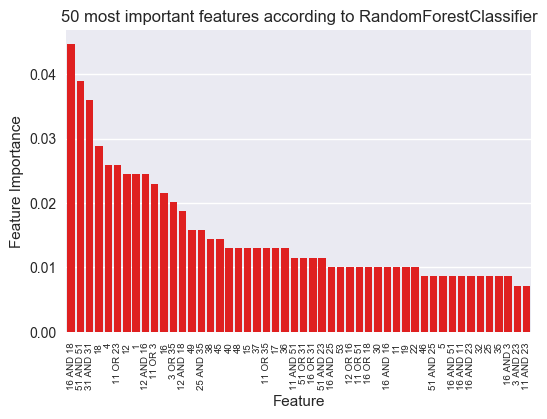

In [29]:
#analyzing feature importance
feature_import = xgb2.feature_importances_
FI = pd.DataFrame()
FI['Feature']= X_new.columns
FI['Importance'] = feature_import
FI.sort_values(by='Importance', ascending=False, inplace=True)
ax = sns.barplot(FI['Feature'].iloc[:50], FI['Importance'].iloc[:50], color='r')
plt.title('50 most important features according to RandomForestClassifier')
plt.xlabel('Feature')
for item in ax.get_xticklabels():
    item.set_fontsize(7)
    
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

## Feature importance

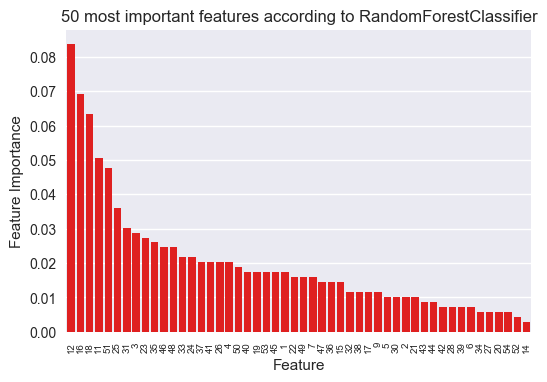

In [83]:
#analyzing feature importance
feature_import = xgb.feature_importances_
FI = pd.DataFrame()
FI['Feature']= np.arange(X.shape[1])
FI['Importance'] = feature_import
FI.sort_values(by='Importance', ascending=False, inplace=True)
#FI.reset_index(drop = True, inplace = True)
ax = sns.barplot(FI['Feature'].iloc[:50], FI['Importance'].iloc[:50], color='r', order = FI['Feature'].iloc[:50])
plt.title('50 most important features according to RandomForestClassifier')
plt.xlabel('Feature')
for item in ax.get_xticklabels():
    item.set_fontsize(7)
    
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

## Stacking

C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


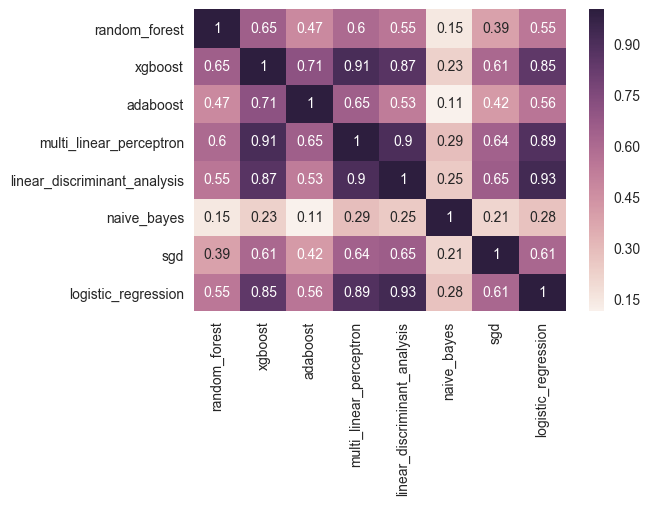

In [25]:
#second_layer_tr = pd.DataFrame(tree.predict_proba(X_train)[:,1],columns = ['tree'])
second_layer_tr = pd.DataFrame(RF.predict_proba(X_train)[:,1],columns = ['random_forest'])
#second_layer_tr['random_forest'] = RF.predict_proba(X_train)[:,1]
second_layer_tr['xgboost'] = xgb.predict_proba(X_train)[:,1]
#second_layer_tr['gradient_boosting'] = boost.predict_proba(X_train)[:,1]
second_layer_tr['adaboost'] = ada.predict_proba(X_train)[:,1]
second_layer_tr['multi_linear_perceptron'] = mlp.predict_proba(X_train)[:,1]
second_layer_tr['linear_discriminant_analysis'] = lda.predict_proba(X_train)[:,1]
second_layer_tr['naive_bayes'] = naive.predict_proba(X_train)[:,1]
second_layer_tr['sgd'] = sgd.predict_proba(X_train)[:,1]
second_layer_tr['logistic_regression'] = reglog.predict_proba(X_train)[:,1]

sns.heatmap(second_layer_tr.corr(),annot=True)

AUC: 0.808
Mean accuracy : 0.933


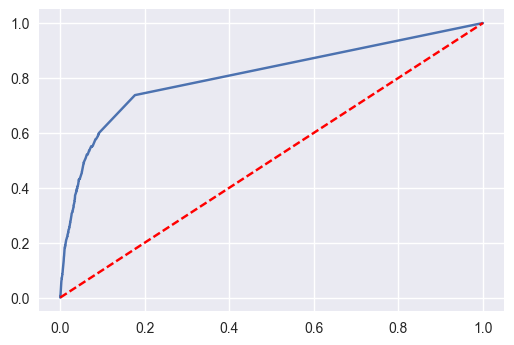

In [26]:
model = GradientBoostingClassifier(random_state = 42, n_estimators = 300, learning_rate = 0.2)
model.fit(second_layer_tr,y_train)

#second_layer_te = pd.DataFrame(tree.predict_proba(X_test)[:,1],columns = ['tree'])
second_layer_te = pd.DataFrame(RF.predict_proba(X_test)[:,1],columns = ['random_forest'])
#second_layer_te['random_forest'] = RF.predict_proba(X_test)[:,1]
second_layer_te['xgboost'] = xgb.predict_proba(X_test)[:,1]
#second_layer_te['gradient_boosting'] = boost.predict_proba(X_test)[:,1]
second_layer_te['adaboost'] = ada.predict_proba(X_test)[:,1]
second_layer_te['multi_linear_perceptron'] = mlp.predict_proba(X_test)[:,1]
second_layer_te['linear_discriminant_analysis'] = lda.predict_proba(X_test)[:,1]
second_layer_te['naive_bayes'] = naive.predict_proba(X_test)[:,1]
second_layer_te['sgd'] = sgd.predict_proba(X_test)[:,1]
second_layer_te['logistc_regression'] = reglog.predict_proba(X_test)[:,1]

y_probas = model.predict_proba(second_layer_te)[:,1]
y_pred = model.predict(second_layer_te)

auc_score = roc_auc_score(y_test,y_probas)

print("AUC: %.3f" %auc_score)
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probas)
plt.plot(fpr1, tpr1, label = 'Second_layer: AUC = %0.3f' % auc_score)
plt.plot([0, 1], [0, 1],'r--')

#### 2/ Keeping the feature construction

C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


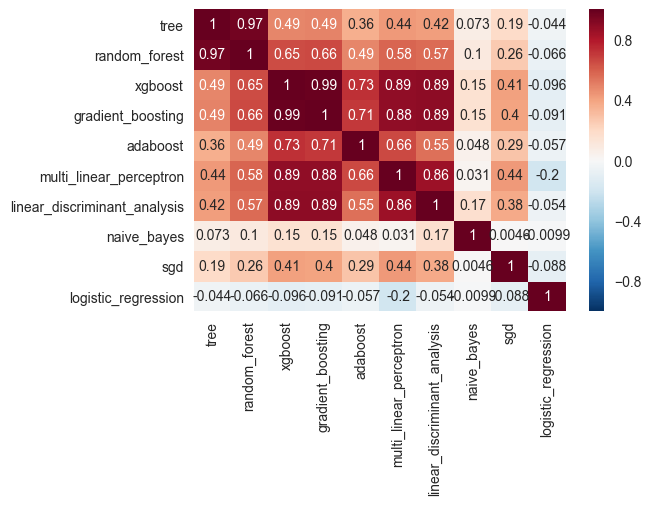

In [35]:
second_layer_tr = pd.DataFrame(tree2.predict_proba(X_train_new)[:,1],columns = ['tree'])
#second_layer_tr = pd.DataFrame(RF2.predict_proba(X_train_new)[:,1],columns = ['random_forest'])
second_layer_tr['random_forest'] = RF2.predict_proba(X_train_new)[:,1]
second_layer_tr['xgboost'] = xgb2.predict_proba(X_train_new)[:,1]
second_layer_tr['gradient_boosting'] = boost2.predict_proba(X_train_new)[:,1]
second_layer_tr['adaboost'] = ada2.predict_proba(X_train_new)[:,1]
second_layer_tr['multi_linear_perceptron'] = mlp2.predict_proba(X_train_new)[:,1]
second_layer_tr['linear_discriminant_analysis'] = lda2.predict_proba(X_train_new)[:,1]
second_layer_tr['naive_bayes'] = naive2.predict_proba(X_train_new)[:,1]
second_layer_tr['sgd'] = sgd2.predict_proba(X_train_new)[:,1]
second_layer_tr['logistic_regression'] = reglog2.predict_proba(X_train_new)[:,1]

sns.heatmap(second_layer_tr.corr(),annot=True)

C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


AUC: 0.727
Mean accuracy : 0.897


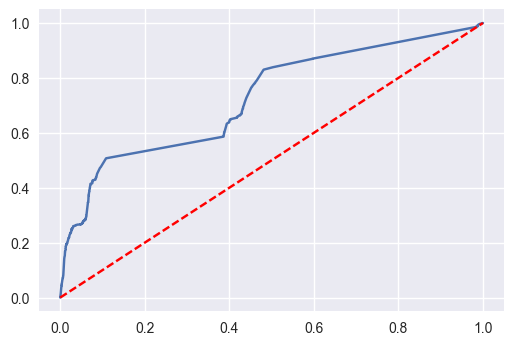

In [37]:
model = GradientBoostingClassifier(random_state = 42, n_estimators = 300, learning_rate = 0.2)
model.fit(second_layer_tr,y_train)

second_layer_te = pd.DataFrame(tree2.predict_proba(X_test_new)[:,1],columns = ['tree'])
#second_layer_te = pd.DataFrame(RF2.predict_proba(X_test_new)[:,1],columns = ['random_forest'])
second_layer_te['random_forest'] = RF2.predict_proba(X_test_new)[:,1]
second_layer_te['xgboost'] = xgb2.predict_proba(X_test_new)[:,1]
second_layer_te['gradient_boosting'] = boost2.predict_proba(X_test_new)[:,1]
second_layer_te['adaboost'] = ada2.predict_proba(X_test_new)[:,1]
second_layer_te['multi_linear_perceptron'] = mlp2.predict_proba(X_test_new)[:,1]
second_layer_te['linear_discriminant_analysis'] = lda2.predict_proba(X_test_new)[:,1]
second_layer_te['naive_bayes'] = naive2.predict_proba(X_test_new)[:,1]
second_layer_te['sgd'] = sgd2.predict_proba(X_test_new)[:,1]
second_layer_te['logistc_regression'] = reglog2.predict_proba(X_test_new)[:,1]

y_probas = model.predict_proba(second_layer_te)[:,1]
y_pred = model.predict(second_layer_te)

auc_score = roc_auc_score(y_test,y_probas)

print("AUC: %.3f" %auc_score)
print("Mean accuracy : %.3f" %np.mean(y_pred == y_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probas)
plt.plot(fpr1, tpr1, label = 'Second_layer: AUC = %0.3f' % auc_score)
plt.plot([0, 1], [0, 1],'r--')

In [51]:
class my_stacking():
    
    def __init__(self,models = None,nfolds = 5,top_clf = XGBClassifier(),labels = [0,1],random_state = 42,recalibration = 0):
        
        self.random_state = random_state
        if models is None:
            models = {'Decision tree': DecisionTreeClassifier(random_state = self.random_state),
                     'Random forest': RandomForestClassifier(n_jobs = -1, random_state = self.random_state),
                     #'Xgboost': XGBClassifier(),
                     'Gradient boosting': GradientBoostingClassifier(random_state = self.random_state),
                     'Adaboost': AdaBoostClassifier(random_state = self.random_state),
                     'Mlp': MLPClassifier(random_state = self.random_state),
                     'Lda': LDA(),
                     'Naive': GaussianNB(),
                     'SVM': SGDClassifier(loss = 'log', random_state = self.random_state),
                     'Reglog': LogisticRegression(random_state = self.random_state)}
        self.recalibration = recalibration
        if self.recalibration == 2:
            #Trouver la bonne dict comprehension ici
            self.models = models
        else:
            self.models = models
        if self.recalibration > 0:
            self.top_clf = CalibratedClassifierCV(base_estimator = top_clf,method = 'isotonic')
        else:
            self.top_clf = top_clf
        self.model_names = list(self.models.keys())
        self.nfolds = nfolds
        self.kfold = KFold(n_splits = self.nfolds,random_state = self.random_state)
        self.labels = labels
            
    def fit(self, Xtr, Ytr):
        second_layer_tr = pd.DataFrame(index = np.arange(len(Xtr)))
        n_fold = 1
        for train_index,test_index in self.kfold.split(Xtr):
            Xtrtr, Ytrtr = Xtr[train_index], Ytr[train_index]
            Xtrte, Ytrte = Xtr[test_index], Ytr[test_index]
            
            for model in self.model_names:
                self.models[model].fit(Xtrtr,Ytrtr)
                preds = self.models[model].predict_proba(Xtrte)
                
                for i in range(len(self.labels)):
                    second_layer_tr.loc[test_index, model+'_class_'+str(self.labels[i])] = preds[:,i]
            print("fold: "+str(n_fold)+" on "+str(self.nfolds))
            n_fold+=1
                
        self.second_layer_tr = second_layer_tr
        
        self.top_clf.fit(second_layer_tr,Ytr)
        for model in self.model_names:
            self.models[model].fit(Xtr,Ytr)
            
    def predict(self, Xte):
        second_layer_te = pd.DataFrame()
        for model in self.model_names:
            preds = self.models[model].predict_proba(Xte)
            
            for i in range(len(self.labels)):
                second_layer_te[model+'_class_'+str(self.labels[i])] = preds[:,i]
                
        self.second_layer_te = second_layer_te
        return self.top_clf.predict(second_layer_te)
    
    def predict_proba(self, Xte):
        second_layer_te = pd.DataFrame()
        for model in self.model_names:
            preds = self.models[model].predict_proba(Xte)
            
            for i in range(len(self.labels)):
                second_layer_te[model+'_class_'+str(self.labels[i])] = preds[:,i]
                
        self.second_layer_te = second_layer_te
        return self.top_clf.predict_proba(second_layer_te)

## Making submissions

In [60]:
logreg_submit = LogisticRegression()
logreg_submit.fit(X_train,y_train)

y_probas = logreg_submit.predict_proba(X_test)[:,1]

print("AUC on crossval: %.3f" %roc_auc_score(y_test,y_probas))
logreg_submit.fit(X,y)

Y_hat_valid = logreg_submit.predict_proba(D.data['X_valid'])[:,1]
Y_hat_test = logreg_submit.predict_proba(D.data['X_test'])[:,1]

result_name = 'reference_0/'
write(result_name + 'credit_valid.predict', Y_hat_valid)
write(result_name + 'credit_test.predict', Y_hat_test)

AUC on crossval: 0.829


In [61]:
rf_submit = RandomForestClassifier(n_estimators=150, criterion ='gini',random_state=42, n_jobs=-1)
rf_submit.fit(X_train,y_train)

y_probas = rf_submit.predict_proba(X_test)[:,1]

print("AUC on crossval: %.3f" %roc_auc_score(y_test,y_probas))
rf_submit.fit(X,y)

Y_hat_valid = rf_submit.predict_proba(D.data['X_valid'])[:,1]
Y_hat_test = rf_submit.predict_proba(D.data['X_test'])[:,1]

result_name = 'reference_1/'
write(result_name + 'credit_valid.predict', Y_hat_valid)
write(result_name + 'credit_test.predict', Y_hat_test)

AUC on crossval: 0.850


In [62]:
xgb_submit = XGBClassifier()
xgb_submit.fit(X_train,y_train)

y_probas = xgb_submit.predict_proba(X_test)[:,1]

print("AUC on crossval: %.3f" %roc_auc_score(y_test,y_probas))
xgb_submit.fit(X,y)

Y_hat_valid = xgb_submit.predict_proba(D.data['X_valid'])[:,1]
Y_hat_test = xgb_submit.predict_proba(D.data['X_test'])[:,1]

result_name = 'reference_2/'
write(result_name + 'credit_valid.predict', Y_hat_valid)
write(result_name + 'credit_test.predict', Y_hat_test)

AUC on crossval: 0.875


In [63]:
mlp_submit = MLPClassifier(random_state = 42)
mlp_submit.fit(X_train,y_train)

y_probas = mlp_submit.predict_proba(X_test)[:,1]

print("AUC on crossval: %.3f" %roc_auc_score(y_test,y_probas))
mlp_submit.fit(X,y)

Y_hat_valid = mlp_submit.predict_proba(D.data['X_valid'])[:,1]
Y_hat_test = mlp_submit.predict_proba(D.data['X_test'])[:,1]

result_name = 'reference_3/'
write(result_name + 'credit_valid.predict', Y_hat_valid)
write(result_name + 'credit_test.predict', Y_hat_test)

AUC on crossval: 0.838


In [64]:
stack_submit = my_stacking(labels = [0,1],nfolds = 2)
stack_submit.fit(X_train,y_train)

y_probas = stack_submit.predict_proba(X_test)[:,1]

print("AUC on crossval: %.3f" %roc_auc_score(y_test,y_probas))
stack_submit.fit(X,y)

Y_hat_valid = stack_submit.predict_proba(D.data['X_valid'])[:,1]
Y_hat_test = stack_submit.predict_proba(D.data['X_test'])[:,1]

result_name = 'reference_4/'
write(result_name + 'credit_valid.predict', Y_hat_valid)
write(result_name + 'credit_test.predict', Y_hat_test)

C:\Program Files\Python 3.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


fold: 1 on 2


C:\Program Files\Python 3.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


fold: 2 on 2


C:\Program Files\Python 3.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AUC on crossval: 0.875


C:\Program Files\Python 3.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


fold: 1 on 2


C:\Program Files\Python 3.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


fold: 2 on 2


C:\Program Files\Python 3.4\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
